# Predicting Hotel Booking Cancelation

## Source Dataset
> - https://www.kaggle.com/jessemostipak/hotel-booking-demand
- Original data : Extraction from hotels’ Property Management System (PMS) SQL databases

## Background and Problem
> The hospitality industry in Portugal is a big industry that delivered a revenue of $3.6 billion in 2017, with a 12.1% year-over-year increase in overnight stays by international visitors to 37.2 million according to the Portugal's National Institute of Statistics  <a href="https://www.hotelnewsnow.com/Articles/286991/Portugals-tourism-boom-sparks-economics-hotel-growth">(source)</a>. The ascension in the number of visitors cannot be separated from the easier access to book a room. 

> Over the years, the hotel industry has changed with a majority of bookings now made through third parties such as Booking.com. But nearly 40 percent of on-the-books revenue is canceled before arrival, according to a study conducted by D-Edge Hospitality Solutions. The average cancelation rate in 2014 was 32.9 percent and increased to 39.6 percent in 2018. It reached a high of 41.3 percent in 2017 <a href = "https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy">(source)</a>. This increase in booking cancellation makes it harder for hotels to accurately forecast, leading to non-optimized occupancy and revenue loss <a href = "https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/">(source)</a>.


>Being able to predict hotel booking cancellations is relevant for many components in the hospitality industry. For example, in room inventory management, predicting cancellations allows to produce accurate dynamic pricing models for hotel rooms. Once the hotel is aware of the number of potential clients that may cancel, they will be able to adjust their prices based on the virtual availability.

>Therefore, if we can predict if a guest would cancel a reservation, hotels could contact guests that most likely to cancel to confirm more efficiently and to resell the room to optimize revenues.

## Aims & Goals
> - To perform exploratory data analysis in order to extract any valuable information
- To build a predictive model to predict the hotel booking cancelation.

## Scope of the dataset

> Feature : 
- Hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled : Value indicating if the booking was canceled (1) or not (0)
- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year : Year of arrival date
- arrival_date_month : Month of arrival date
- arrival_date_week_number : Week number of year for arrival date
- arrival_date_day_of_month : Day of arrival date
- stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults : Number of adults
- children : Number of children
- babies : Number of babies
- meal : 	Type of meal booked. Categories are presented in standard hospitality meal packages
- country : Country of origin. Categories are represented in the ISO 3155–3:2013 format
- market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons
- assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
- booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- deposit_type : Indication on if the customer made a deposit to guarantee the booking
- agent : ID of the travel agency that made the booking
- company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type : Type of booking
- adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces : Number of car parking spaces required by the customer
- total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status : 	Reservation last status
- reservation_status_date : Date at which the last status was set.


## Importing Libraries & Dataset

In [2]:
#Basic Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set_style(style ='whitegrid')
import re
import nltk
from nltk.corpus import wordnet, stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
print('Set up complete')

Set up complete


In [3]:
df = pd.read_csv('C:/Users/ID20113/Documents/Python/Module-3/Final_Project/hotel_bookings.csv')

## Getting know about the data

- This data set were extracted from hotels’ Property Management System (PMS) SQL databases which contains booking information for a city hotel located in the city of Lisbon and a resort hotel at the resort region of Algarve
- Both hotels are located in Portugal, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

In [4]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
lead time max disetiap bulan di tahun 2015
select * 
from lead_time
where lead_time = lead_time.max() & arrival_date_year = 2015
group by arrival_date_month

select arrival_date_month, max(lead_time)
from df 
where arrival_date_year = 2015
group by arrival_date_month
having arrival_date_month = 'June'


In [5]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

The dataset contains 119390 entries with some missing values 

In [6]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
is_canceled,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Checking Null Value

In [7]:
total = df.isnull().sum().sort_values(ascending=False).head(15)
total

company                      112593
agent                         16340
country                         488
children                          4
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
is_canceled                       0
market_segment                    0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
dtype: int64

#### 'Company' attribute

In [8]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

<b>Company</b> : ID of the company/entity that made the booking or responsible for paying the booking. For NULL values, It can be intrepete as hotel being booked personally. So in this case, I'll impute "NULL" with 0

#### 'Agent' attribute

In [9]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

<b>Agent</b> : It is the same case with the 'Company' case, so It can be intrepete as hotel being reserved personally. So in this case, I'll impute "NULL" with 0

#### 'Country' attribute

In [10]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
VGB        1
BHS        1
LCA        1
ATF        1
Name: country, Length: 177, dtype: int64

<b>Country</b> : Country of origin. For reservation with unspecified country, I'll impute with "UNK" as short for Unknown

#### 'Children' attribute

In [11]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

<b>Children</b> : Number of children. Most of reservation included no children. So I'll impute missing values with 0.

## Impute Missing & Wrong Value & Dropping Column

In [12]:
df[df['adr']<0].sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [13]:
df = df[df.adr > 0]

In [14]:
Nan_handling = {'company': 0,
                'agent' : 0,
                'country' : 'UNK',
                'children' : 0
               }
df = df.fillna(value = Nan_handling)
df = df.replace({'CN':'CHN'}) #update China ISO naming from CN to CHN

In [15]:
df.nunique().sort_values(ascending=False)

adr                               8877
reservation_status_date            924
lead_time                          478
company                            344
agent                              333
country                            177
days_in_waiting_list               127
previous_bookings_not_canceled      73
arrival_date_week_number            53
stays_in_week_nights                32
arrival_date_day_of_month           31
booking_changes                     19
stays_in_weekend_nights             16
previous_cancellations              15
arrival_date_month                  12
assigned_room_type                  11
reserved_room_type                   9
market_segment                       8
total_of_special_requests            6
children                             5
adults                               5
distribution_channel                 5
babies                               5
meal                                 5
required_car_parking_spaces          5
customer_type            

Observation:
- There are 2 hotels, 3 deposit types, 3 reservation status types, and 4 customer types
- The 'adr' seems not an unique value, it is understandable since adr is the average daily rate as a sum of all lodging transactions divided by total number of staying nights.
- Customers are from 177 different countries

In [16]:
df['is_canceled'].value_counts(normalize=True)

0    0.625215
1    0.374785
Name: is_canceled, dtype: float64

In [17]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.625215
Canceled     0.364728
No-Show      0.010057
Name: reservation_status, dtype: float64

In [18]:
df.drop(columns=['reservation_status'],inplace=True)
df.dropna(axis=0,inplace=True)

is_canceled & reservation_status provide same information, we can drop reservation_status for model building purpose

In [19]:
df.loc[:, 'total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.loc[:, 'price'] = df['adr'] * df['total_nights']

## Exploratory Data Analysis (EDA)

### Correlation between features

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1763a1fd748&gt;

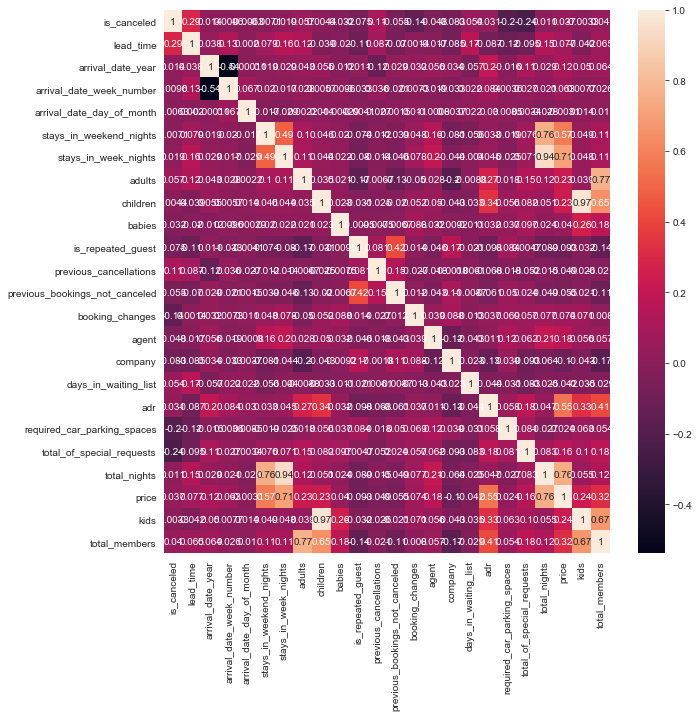

In [99]:
f,ax=plt.subplots(figsize=(10,10))
data_nms=df
sns.heatmap(data_nms.corr(),annot=True)

Observation:
- It looks like there is no strong correlation between variables. The highest one only reach +0.5 form correlation between days_in_weekend_nights and stays_in_week_nights

### Which hotel has more cancelations?

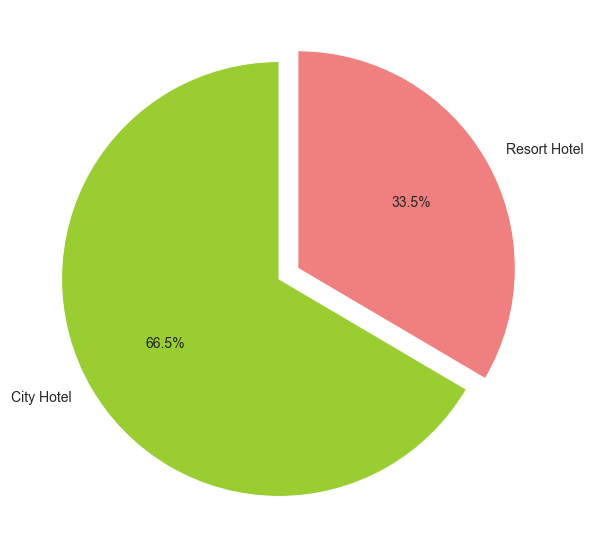

In [376]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

In [145]:
df['hotel'].value_counts()

City Hotel      78122
Resort Hotel    39308
Name: hotel, dtype: int64

Text(0, 0.5, &#39;Canceled or Not Canceled&#39;)

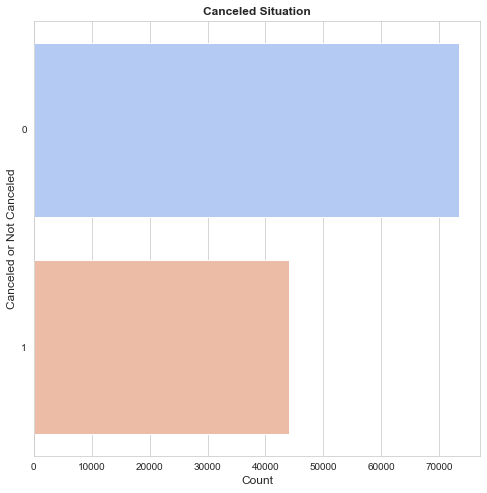

In [378]:
# `is_canceled` graph

plt.figure(figsize=(8,8))
sns.countplot(y='is_canceled', data= df, palette='coolwarm', orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

In [147]:
df['is_canceled'].value_counts(normalize=True)

0    0.625215
1    0.374785
Name: is_canceled, dtype: float64

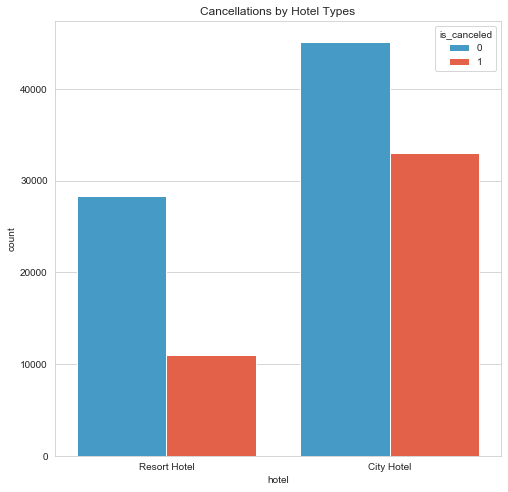

In [379]:
plt.figure(figsize=(8,8))
plt.title(label='Cancellations by Hotel Types')
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.show()

In [149]:
# % of cancellations in Resort Hotel
df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True)

0    0.719192
1    0.280808
Name: is_canceled, dtype: float64

In [150]:
# % of cancellations in City Hotel
df[df['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)

0    0.577929
1    0.422071
Name: is_canceled, dtype: float64

Observation :
- Therea are two hotels in the dataset which are City Hotel and Resort Hotel.
- City Hotel has 32.8% more visitor than Resort Hotel. I assume cheaper price in City Hotel led people to choose them over Resort Hotel
- Even though City Hotel has more visitor, they also has higher booking cancelation 41.7% compared to Resort Hotel 27.7% 
- In total there is 37% booking cancelation from all the booking data

### Where are the visitors come from?

[Text(0, 0.5, &#39;country&#39;), Text(0.5, 0, &#39;No. of visitor&#39;)]

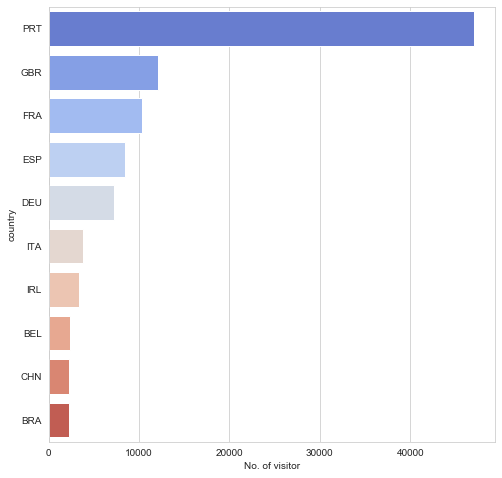

In [151]:
cdf = df.groupby('country').size().reset_index(name='country_count').sort_values('country_count', ascending = False).head(10)

fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(x = 'country_count', y = 'country', data = cdf, palette = 'coolwarm',ax=ax)
ax.set(xlabel = 'No. of visitor', ylabel = 'country')

Observation :
- Most visitors are from Portugal then followed by Great Britain, France, Spain, and Netherlands
- It is understandable because the two hotels are located in Portugal, so it's not that surprising the majority of visitors are from Portugal and other Europe countries

### Does lead time affect cancelation?

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2234838b148&gt;

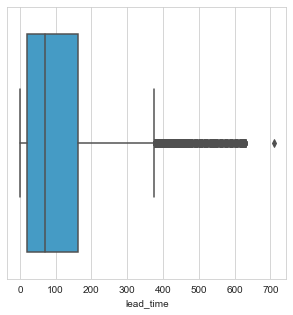

In [152]:
sns.boxplot(x = df['lead_time'])


In [153]:
df['lead_time'].describe()

count    117430.000000
mean        105.084340
std         106.907012
min           0.000000
25%          19.000000
50%          71.000000
75%         162.000000
max         709.000000
Name: lead_time, dtype: float64

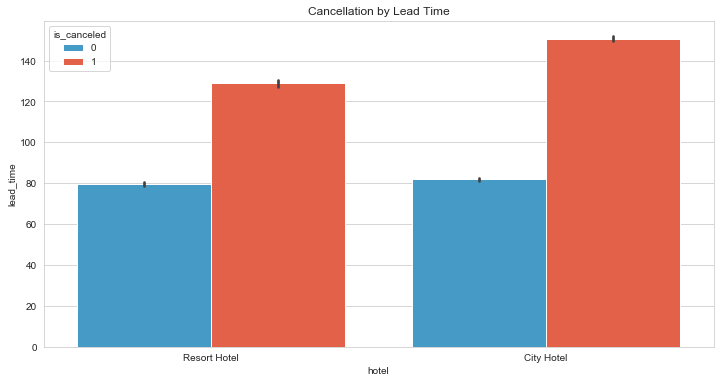

In [154]:
plt.figure(figsize=(12,6))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='hotel',y='lead_time',hue='is_canceled',data=df)
plt.show()

Observation:
- It can be seen that on average potential visitors book a room about 100 days before the day of reservation
- Looks like the longer the lead time, the reservation is more likely to be canceled 
- I conclude that most visitors reserved a room about 2 months (60 days) in advance

### Does total member affects cancelation?

In [53]:
# Merge 
df['kids'] = df.children + df.babies
df['total_members'] = df['kids'] + df['adults']

In [156]:
df.total_members.value_counts()

2.0     81239
1.0     21725
3.0     10407
4.0      3893
5.0       132
0.0        31
12.0        2
10.0        1
Name: total_members, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x22347ca4888&gt;

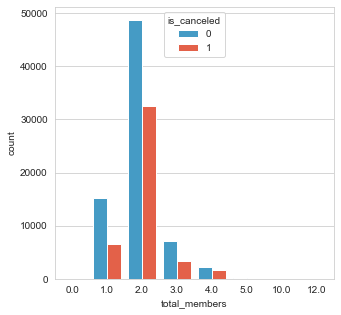

In [157]:
sns.countplot(x = 'total_members', data = df, hue = 'is_canceled')

In [158]:
u = df[np.logical_and(df['is_canceled']!=0, df['total_members']>=6)]
len(u)

1

In [159]:
u2 = df[np.logical_and(df['is_canceled']==0, df['total_members']>=6)]
len(u2)

2

Observation :
- Total member of 2 people has the highest number of cancelation, this is understandable since majority of visitors are couples (2-person)
- It is interesting that the total member of more than 5 people are prone to cancel (15 vs 2)

### Does deposit type affect cancelation?

&lt;matplotlib.axes._subplots.AxesSubplot at 0x223483eeb88&gt;

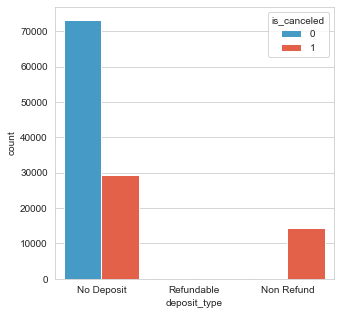

In [160]:
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled') 

In [161]:
(df[df['is_canceled'] == 1])['deposit_type'].value_counts()


No Deposit    29481
Non Refund    14494
Refundable       36
Name: deposit_type, dtype: int64

In [162]:
(df[df['is_canceled'] == 0])['deposit_type'].value_counts()


No Deposit    73200
Refundable      126
Non Refund       93
Name: deposit_type, dtype: int64

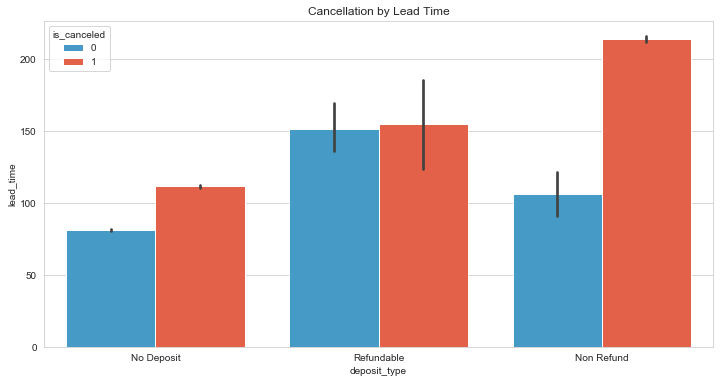

In [163]:
plt.figure(figsize=(12,6))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='deposit_type',y='lead_time',hue='is_canceled',data=df)
plt.show()

Observation :
- Most of reservation require no deposit, while some were non-refundable
- It is very interesting that reservations with No-deposit or Non-refund policy are more likely to be canceled

### Does ADR affect cancelation?

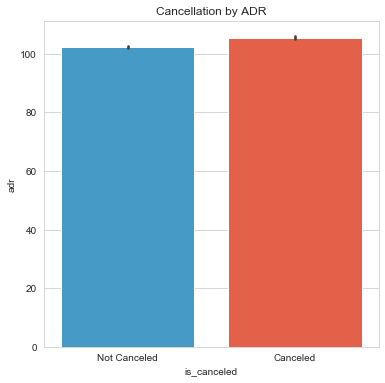

In [100]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by ADR')
sns.barplot(x='is_canceled',y='adr',data=df)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

plt.show()

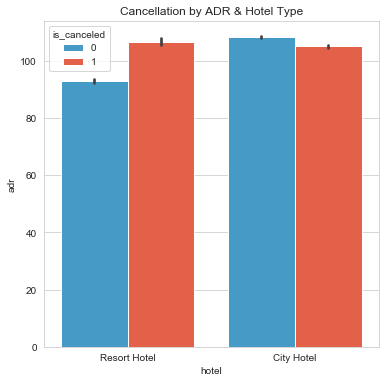

In [97]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by ADR & Hotel Type')
sns.barplot(x='hotel',y='adr',hue='is_canceled',data=df)
plt.show()

Observation :
- It looks like the cancellations in Resort Hotels had a higher ADR

### Does Market Segment affect cancelation?

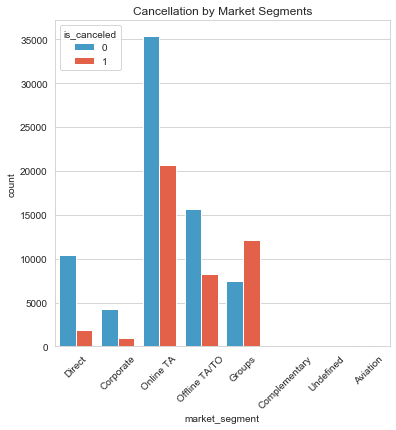

In [166]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Market Segments')
plt.xticks(rotation=45) 
sns.countplot(x='market_segment',hue='is_canceled',data=df)
plt.show()

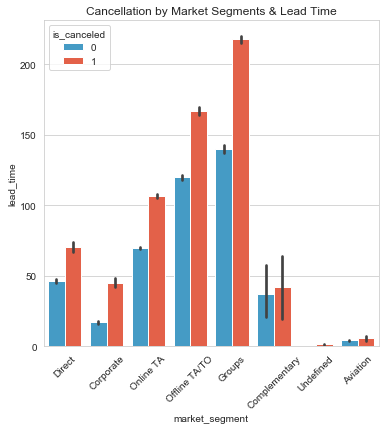

In [20]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Market Segments & Lead Time')
plt.xticks(rotation=45) 
sns.barplot(x='market_segment',y='lead_time',hue='is_canceled',data=df)
plt.show()

- The cancellation percentage of groups is higher than other segments

- The cancellation number of Online TA is higher than other segments

- Almost all canceled reservations have a higher ADR.

### Which are types of room that has the highest precentage of being canceled?

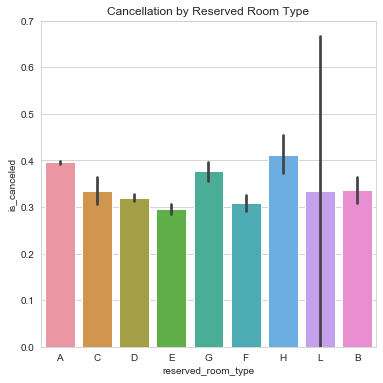

In [260]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Reserved Room Type')
sns.barplot(x='reserved_room_type',y='is_canceled',data=df)
plt.show()

In [263]:
pd.crosstab(df['reserved_room_type'],df['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
reserved_room_type,,
A,0.604164,0.395836
B,0.663594,0.336406
C,0.664841,0.335159
D,0.679768,0.320232
E,0.704032,0.295968
F,0.690864,0.309136
G,0.623131,0.376869
H,0.588235,0.411765
L,0.666667,0.333333


Observation:
- As we can see, Customers who reserved room type H have the highest percentage booking cancellation with 41.2% of bookings canceled. As the dataset did not provide the actual room designations for anonymity purposes, it is hard to interpret why bookings of room type H are canceled more often.

### Does special request including car parking space affect cancelation?

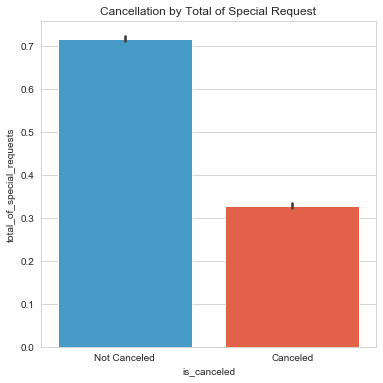

In [249]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Total of Special Request')
sns.barplot(x='is_canceled',y='total_of_special_requests',data=df)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
plt.show()

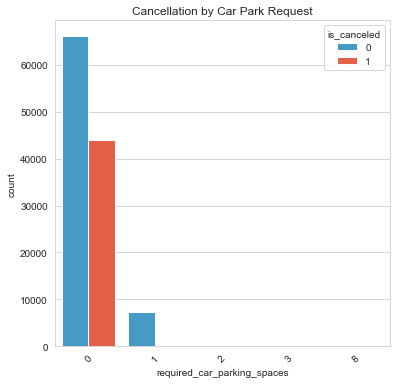

In [247]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Car Park Request')
plt.xticks(rotation=45) 
sns.countplot(x='required_car_parking_spaces',hue='is_canceled',data=df)
plt.show()

In [246]:
df.required_car_parking_spaces.value_counts()

0    110122
1      7275
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [103]:
df.total_of_special_requests.value_counts()

0    69140
1    32727
2    12763
3     2436
4      324
5       40
Name: total_of_special_requests, dtype: int64

Observation:
- As the number of parking spaces requests increases, the likelihood that a booking is canceled decreases
- As the number of special requests made increases, the likelihood that a booking is canceled decreases. This suggests that engagement with the hotel prior to arrival and feeling like their needs are heard may make a customer less likely to cancel their reservation.

### Does distribution channels affect cancelation?

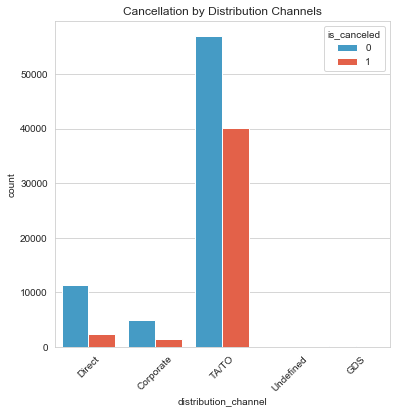

In [170]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Distribution Channels')
plt.xticks(rotation=45) 
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.show()

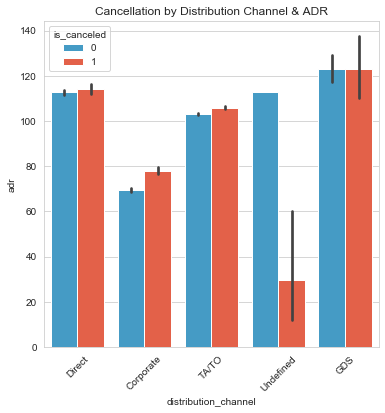

In [102]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Distribution Channel & ADR')
plt.xticks(rotation=45) 
sns.barplot(x='distribution_channel',y='adr',hue='is_canceled',data=df)
plt.show()

In [171]:
df.distribution_channel.value_counts()

TA/TO        96913
Direct       13838
Corporate     6485
GDS            189
Undefined        5
Name: distribution_channel, dtype: int64

- Reservations from Travel Agents or Tour Operators are more likely to be canceled

### What is the busiest month and which month whose the number of cancelation is the highest?

Text(0.5, 0, &#39;Month&#39;)

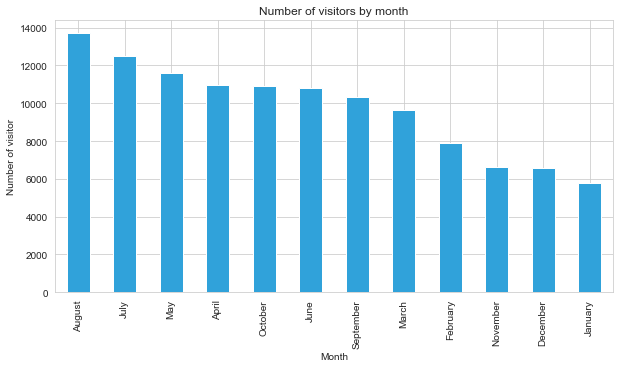

In [172]:
df.arrival_date_month.value_counts().nlargest(12).plot(kind = 'bar', figsize = (10,5))
plt.title('Number of visitors by month')
plt.ylabel('Number of visitor')
plt.xlabel('Month')

In [173]:
df_v = df.copy()
df_v['reservation_status_date'] = pd.to_datetime(df_v['reservation_status_date'], format='%Y-%m-%d')

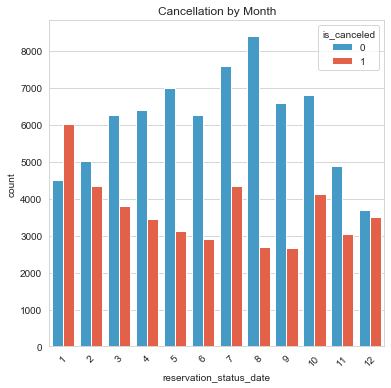

In [174]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Month')
plt.xticks(rotation=45) 
sns.countplot(x=df_v['reservation_status_date'].dt.month,hue='is_canceled',data=df_v)
plt.show()

Observation :
- August is the busiest month with the highest number of visitor
- I can conclude that numerous visitors come in Q3 of the year, it is understandable that people tend to go holiday in summer
- The lowest number of cancelation are in August and September
- January is the month of the least visitors also the month of the highest number of cancelation

## Feature Selection

In [124]:
df_le = df.copy()

### Correlation

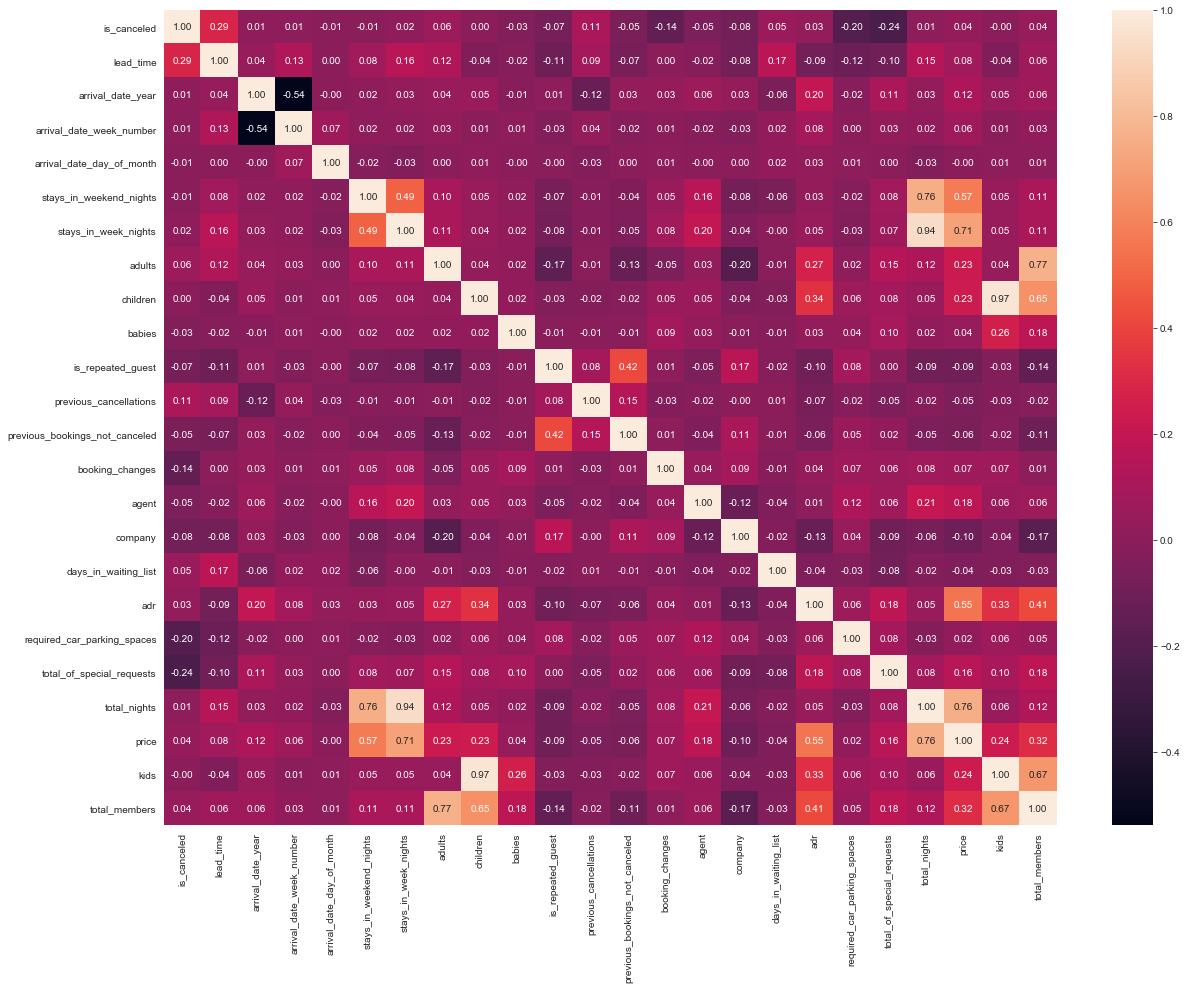

In [55]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');

Observation:
- There is high correlation between total members and adults also with chidren
- And in the same, there is high correlation between total_nights and stays_in_week_nights
- High correlation also observed in total_nights and stays_in_weekend_nights

In [118]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [125]:
X_le = df_le.drop('is_canceled', axis=1)
y = df_le['is_canceled']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size=.3, random_state=42)


In [127]:
X_le.columns

Index([&#39;hotel&#39;, &#39;lead_time&#39;, &#39;arrival_date_year&#39;, &#39;arrival_date_month&#39;,
       &#39;arrival_date_week_number&#39;, &#39;arrival_date_day_of_month&#39;,
       &#39;stays_in_weekend_nights&#39;, &#39;stays_in_week_nights&#39;, &#39;adults&#39;, &#39;children&#39;,
       &#39;babies&#39;, &#39;meal&#39;, &#39;country&#39;, &#39;market_segment&#39;, &#39;distribution_channel&#39;,
       &#39;is_repeated_guest&#39;, &#39;previous_cancellations&#39;,
       &#39;previous_bookings_not_canceled&#39;, &#39;reserved_room_type&#39;,
       &#39;assigned_room_type&#39;, &#39;booking_changes&#39;, &#39;deposit_type&#39;, &#39;agent&#39;,
       &#39;company&#39;, &#39;days_in_waiting_list&#39;, &#39;customer_type&#39;, &#39;adr&#39;,
       &#39;required_car_parking_spaces&#39;, &#39;total_of_special_requests&#39;,
       &#39;reservation_status_date&#39;, &#39;total_nights&#39;, &#39;price&#39;, &#39;kids&#39;,
       &#39;total_members&#39;],
      dtype=&#39;ob

In [128]:
columns = [
    'reservation_status_date',
    'stays_in_week_nights',
    'stays_in_weekend_nights',
    'hotel',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'adults',
    'children',
    'babies',
    'days_in_waiting_list',
    'price',
    'kids'
]

df_le = df_le.drop(columns, axis=1)

In [129]:
df_le.columns

Index([&#39;is_canceled&#39;, &#39;lead_time&#39;, &#39;arrival_date_month&#39;, &#39;meal&#39;, &#39;country&#39;,
       &#39;market_segment&#39;, &#39;distribution_channel&#39;, &#39;is_repeated_guest&#39;,
       &#39;previous_cancellations&#39;, &#39;previous_bookings_not_canceled&#39;,
       &#39;reserved_room_type&#39;, &#39;assigned_room_type&#39;, &#39;booking_changes&#39;,
       &#39;deposit_type&#39;, &#39;agent&#39;, &#39;company&#39;, &#39;customer_type&#39;, &#39;adr&#39;,
       &#39;required_car_parking_spaces&#39;, &#39;total_of_special_requests&#39;,
       &#39;total_nights&#39;, &#39;total_members&#39;],
      dtype=&#39;object&#39;)

### Dummy Variables

In [130]:
df_le.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 117430 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     117430 non-null  int64  
 1   lead_time                       117430 non-null  int64  
 2   arrival_date_month              117430 non-null  object 
 3   meal                            117430 non-null  object 
 4   country                         117430 non-null  object 
 5   market_segment                  117430 non-null  object 
 6   distribution_channel            117430 non-null  object 
 7   is_repeated_guest               117430 non-null  int64  
 8   previous_cancellations          117430 non-null  int64  
 9   previous_bookings_not_canceled  117430 non-null  int64  
 10  reserved_room_type              117430 non-null  object 
 11  assigned_room_type              117430 non-null  object 
 12  bo

In [131]:
categoricals = [
    'arrival_date_month',
    'country',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    ]

In [132]:
new_categoricals = [col for col in categoricals if col in df_le.columns]
df_hot = pd.get_dummies(data=df_le, columns=new_categoricals)

In [133]:
X_hot = df_hot.drop('is_canceled', axis=1)
y = df_hot['is_canceled']

In [134]:
X_hot.columns

Index([&#39;lead_time&#39;, &#39;is_repeated_guest&#39;, &#39;previous_cancellations&#39;,
       &#39;previous_bookings_not_canceled&#39;, &#39;booking_changes&#39;, &#39;adr&#39;,
       &#39;required_car_parking_spaces&#39;, &#39;total_of_special_requests&#39;,
       &#39;total_nights&#39;, &#39;total_members&#39;,
       ...
       &#39;company_530.0&#39;, &#39;company_531.0&#39;, &#39;company_534.0&#39;, &#39;company_539.0&#39;,
       &#39;company_541.0&#39;, &#39;company_543.0&#39;, &#39;customer_type_Contract&#39;,
       &#39;customer_type_Group&#39;, &#39;customer_type_Transient&#39;,
       &#39;customer_type_Transient-Party&#39;],
      dtype=&#39;object&#39;, length=1098)

In [135]:
for i in X_hot.columns:
    print(i)


lead_time
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
adr
required_car_parking_spaces
total_of_special_requests
total_nights
total_members
arrival_date_month_April
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
country_ABW
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_BHS
country_BIH
country_BLR
country_BOL
country_BRA
country_BRB
country_BWA
country_CAF
country_CHE
country_CHL
country_CHN
country_CIV
country_CMR
country_COL
country_COM
country_CPV
country_CRI
country_CUB
country_CYM
country_CYP
country_CZE

### First Glance - Logistic Regression

In [157]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve, recall_score

In [137]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [138]:
from sklearn.linear_model import LogisticRegression

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_hot, y, test_size=.3, random_state=42)

In [161]:
log = LogisticRegression().fit(X_train, y_train)
y_pred = log.predict(X_test)

In [162]:
log_rec = recall_score(y_test, y_pred)
print('Recall:',log_rec)

Recall: 0.6544289483603468


In [163]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.91      0.86     21964
           1       0.81      0.65      0.72     13265

    accuracy                           0.81     35229
   macro avg       0.81      0.78      0.79     35229
weighted avg       0.81      0.81      0.81     35229



## Increase the cancelled booking samples

In [167]:
from imblearn.over_sampling import SMOTE

In [168]:
smote=SMOTE()

In [169]:
y_train.to_numpy()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
X_smote, y_smote=smote.fit_sample(X_train.to_numpy(),y_train)

In [171]:
len(X_train)

82201

In [172]:
len(X_smote)

102910

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=.3, random_state=42)

In [174]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve, recall_score

In [175]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Recall score:\n')
        print(recall_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    def plot_roc_curve(self, model, save=False):
        probs = model.predict_proba(self.X)
        preds = probs[:, 1]

        fpr, tpr, threshold = roc_curve(self.y, preds)
        roc_auc = auc(fpr, tpr)
        print(fpr,tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([-0.1, 1], [-0.1, 1], 'r--')
        plt.xlim([-0.1, 1])
        plt.ylim([-0.1, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        if save:
            name = model.__class__.__name__
            plt.savefig(f'./images/{name}_{part}.png')
        plt.show()

In [176]:
report = Report(X_test, y_test)

### Logistic Regression

In [190]:
log = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = log.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
log_rec = recall_score(y_test, y_pred)
print('Accuracy:',log_acc)
print('Recall:',log_rec)
print(classification_report(y_test, y_pred))


Accuracy: 0.8136235545622389
Recall: 0.7905171851561991
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     15540
           1       0.83      0.79      0.81     15333

    accuracy                           0.81     30873
   macro avg       0.81      0.81      0.81     30873
weighted avg       0.81      0.81      0.81     30873



In [189]:
log_train = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred_train = log_train.predict(X_train)
log_acc_train = accuracy_score(y_train, y_pred_train)
log_rec_train = recall_score(y_train, y_pred_train)
print('Accuracy:',log_acc_train)
print('Recall:',log_rec_train)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.8127906492496911
Recall: 0.7928686119262499
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     35915
           1       0.83      0.79      0.81     36122

    accuracy                           0.81     72037
   macro avg       0.81      0.81      0.81     72037
weighted avg       0.81      0.81      0.81     72037



[0.         0.         0.         ... 0.99967825 0.99967825 1.        ] [0.00000000e+00 7.82625709e-04 1.36959499e-03 ... 9.99934781e-01
 1.00000000e+00 1.00000000e+00]


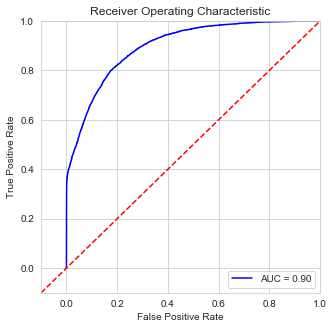

In [209]:
report.plot_roc_curve(log)

### Naive Bayes

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [192]:
nb = GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
nb_rec = recall_score(y_test, y_pred)
print('Accuracy:',nb_acc)
print('Recall:',nb_rec)
print(classification_report(y_test, y_pred))

Accuracy: 0.6218702426068086
Recall: 0.9601513076371225
              precision    recall  f1-score   support

           0       0.88      0.29      0.43     15540
           1       0.57      0.96      0.72     15333

    accuracy                           0.62     30873
   macro avg       0.73      0.62      0.58     30873
weighted avg       0.73      0.62      0.57     30873



In [193]:
nb = GaussianNB().fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
nb_acc_train = accuracy_score(y_train, y_pred_train)
nb_rec_train = recall_score(y_train, y_pred_train)
print('Accuracy:',nb_acc_train)
print('Recall:',nb_rec_train)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.6199175423740578
Recall: 0.9607995127623056
              precision    recall  f1-score   support

           0       0.88      0.28      0.42     35915
           1       0.57      0.96      0.72     36122

    accuracy                           0.62     72037
   macro avg       0.72      0.62      0.57     72037
weighted avg       0.72      0.62      0.57     72037



[0.         0.71531532 0.71621622 0.71653797 0.71698842 0.71750322
 0.71788932 0.71833977 0.71840412 0.71853282 0.71859717 0.71872587
 0.71879022 0.71891892 0.71943372 0.71956242 0.71969112 0.71981982
 0.71981982 0.72020592 0.72020592 0.72033462 0.72033462 0.72046332
 0.72046332 0.72123552 0.72123552 0.72226512 0.72239382 0.72258687
 0.72258687 0.72277992 0.72303732 0.72316602 0.72316602 0.72348777
 0.72348777 0.72355212 0.72355212 0.72361647 0.72361647 0.72368082
 0.72368082 0.72380952 0.72380952 0.72380952 0.72438867 0.72438867
 0.72445302 0.72445302 0.72458172 0.72458172 0.72496782 0.72496782
 0.72548263 0.72548263 0.72554698 0.72554698 0.72586873 0.72586873
 0.72606178 0.72606178 0.72612613 0.72612613 0.72631918 0.72631918
 0.72644788 0.72644788 0.72657658 0.72657658 0.72689833 0.72689833
 0.72696268 0.72696268 0.72760618 0.72760618 0.72767053 0.72767053
 0.72773488 0.72773488 0.72786358 0.72786358 0.72792793 0.72792793
 0.72805663 0.72805663 0.72831403 0.72831403 0.72850708 0.7285

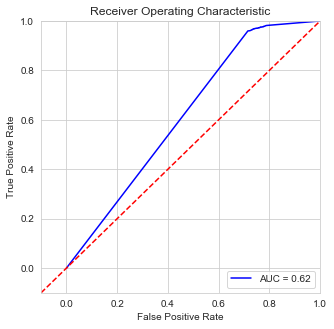

In [214]:
report.plot_roc_curve(nb)

### KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)
print('Acc:',knn_acc)
print('Recall:',knn_rec)
print(classification_report(y_test, y_pred))

Acc: 0.7758883166520908
Recall: 0.8635622513532903
              precision    recall  f1-score   support

           0       0.84      0.69      0.76     15540
           1       0.73      0.86      0.79     15333

    accuracy                           0.78     30873
   macro avg       0.78      0.78      0.77     30873
weighted avg       0.79      0.78      0.77     30873



In [187]:
knn_train = KNeighborsClassifier().fit(X_train, y_train)
y_pred_train = knn_train.predict(X_train)
knn_acc_train = accuracy_score(y_train, y_pred_train)
knn_rec_train = recall_score(y_train, y_pred_train)
print('Acc:',knn_acc_train)
print('Rec:',knn_rec_train)
print(classification_report(y_train, y_pred_train))

Acc: 0.8545192054083318
Rec: 0.923232379159515
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     35915
           1       0.81      0.92      0.86     36122

    accuracy                           0.85     72037
   macro avg       0.86      0.85      0.85     72037
weighted avg       0.86      0.85      0.85     72037



[0.         0.0454955  0.15469755 0.31306306 0.48648649 0.67142857
 1.        ] [0.         0.58475184 0.74212483 0.86610578 0.94397704 0.98513011
 1.        ]


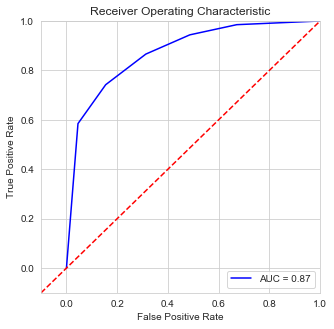

In [218]:
report.plot_roc_curve(knn)

### Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [195]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)
print('Acc:',rf_acc)
print('Recall:',rf_rec)
print(classification_report(y_test, y_pred))

Acc: 0.9036374825899653
Recall: 0.8790191091110676
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15540
           1       0.92      0.88      0.90     15333

    accuracy                           0.90     30873
   macro avg       0.90      0.90      0.90     30873
weighted avg       0.90      0.90      0.90     30873



In [196]:
rf_train = RandomForestClassifier().fit(X_train, y_train)
y_pred_train = rf_train.predict(X_train)
rf_acc_train = accuracy_score(y_train, y_pred_train)
rf_rec_train = recall_score(y_train, y_pred_train)
print('Acc:',rf_acc_train)
print('Recall:',rf_rec_train)
print(classification_report(y_train, y_pred_train))

Acc: 0.9969598956092008
Recall: 0.9969270804495876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35915
           1       1.00      1.00      1.00     36122

    accuracy                           1.00     72037
   macro avg       1.00      1.00      1.00     72037
weighted avg       1.00      1.00      1.00     72037



[0.00000000e+00 1.93050193e-04 1.93050193e-04 1.93050193e-04
 2.57400257e-04 2.57400257e-04 5.79150579e-04 5.79150579e-04
 5.79150579e-04 5.79150579e-04 5.79150579e-04 5.79150579e-04
 5.79150579e-04 6.43500644e-04 6.43500644e-04 6.43500644e-04
 6.43500644e-04 6.43500644e-04 6.43500644e-04 7.72200772e-04
 7.72200772e-04 7.72200772e-04 7.72200772e-04 7.72200772e-04
 7.72200772e-04 7.72200772e-04 9.00900901e-04 9.00900901e-04
 9.00900901e-04 9.00900901e-04 9.00900901e-04 9.00900901e-04
 1.28700129e-03 1.28700129e-03 1.28700129e-03 1.28700129e-03
 1.35135135e-03 1.35135135e-03 1.35135135e-03 1.35135135e-03
 1.35135135e-03 1.35135135e-03 1.35135135e-03 1.48005148e-03
 1.48005148e-03 1.48005148e-03 1.48005148e-03 1.48005148e-03
 1.80180180e-03 1.80180180e-03 1.80180180e-03 1.80180180e-03
 1.80180180e-03 1.80180180e-03 1.80180180e-03 1.80180180e-03
 1.80180180e-03 1.80180180e-03 1.86615187e-03 1.86615187e-03
 2.31660232e-03 2.31660232e-03 2.31660232e-03 2.31660232e-03
 2.31660232e-03 2.316602

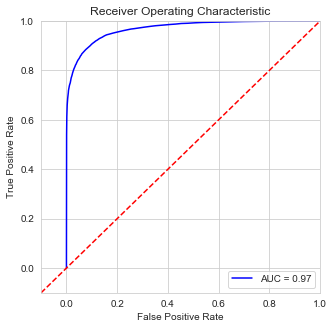

In [222]:
report.plot_roc_curve(rf)

### XGBoost

In [85]:
from xgboost import XGBClassifier

In [197]:
xgb = XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_rec = recall_score(y_test, y_pred)
print('Acc:',xgb_acc)
print('Recall:',xgb_rec)
print(classification_report(y_test, y_pred))

Acc: 0.8650924756259515
Recall: 0.8362355703384856
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     15540
           1       0.89      0.84      0.86     15333

    accuracy                           0.87     30873
   macro avg       0.87      0.86      0.86     30873
weighted avg       0.87      0.87      0.86     30873



In [198]:
xgb_train = XGBClassifier().fit(X_train, y_train)
y_pred_train = xgb_train.predict(X_train)
xgb_acc_train = accuracy_score(y_train, y_pred_train)
xgb_rec_train = recall_score(y_train, y_pred_train)
print('Acc:',xgb_acc_train)
print('Recall:',xgb_rec_train)
print(classification_report(y_train, y_pred_train))

Acc: 0.8702055887946472
Recall: 0.8444991971651625
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     35915
           1       0.89      0.84      0.87     36122

    accuracy                           0.87     72037
   macro avg       0.87      0.87      0.87     72037
weighted avg       0.87      0.87      0.87     72037



[0.        0.        0.        ... 0.9970399 0.9972973 1.       ] [0.00000000e+00 6.52188091e-05 7.82625709e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


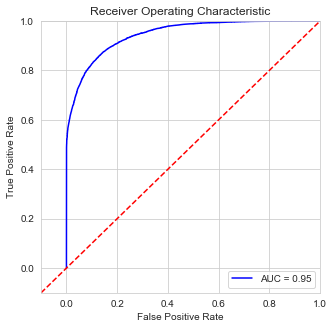

In [226]:
report.plot_roc_curve(xgb)

### Summary

In [201]:
summary = pd.DataFrame({'Model': ['Logistic Regression - Baseline Model', 'Naive Bayes - Baseline Model', 'KNN - Baseline Model',
                                  'Random Forest - Baseline Model','XGBoost - Baseline Model'],
                      'Acc Score': [log_acc, nb_acc, knn_acc, rf_acc, xgb_acc],
                      'Recall Score': [log_rec, nb_rec, knn_rec, rf_rec, xgb_rec],
                      'Acc Train Score': [log_acc_train, nb_acc_train, knn_acc_train, rf_acc_train, xgb_acc_train],
                      'Recall Train Score': [log_rec_train, nb_rec_train, knn_rec_train, rf_rec_train, xgb_rec_train]})
print('Model Score Summary')
summary.sort_values(by = 'Acc Score', ascending = False).set_index('Model')

Model Score Summary


,Acc Score,Recall Score,Acc Train Score,Recall Train Score
Model,,,,
Random Forest - Baseline Model,0.903637,0.879019,0.996960,0.996927
XGBoost - Baseline Model,0.865092,0.836236,0.870206,0.844499
Logistic Regression - Baseline Model,0.813624,0.790517,0.812791,0.792869
KNN - Baseline Model,0.775888,0.863562,0.854519,0.923232
Naive Bayes - Baseline Model,0.621870,0.960151,0.619918,0.960800


Text(0.5, 1.0, &#39;Recall Scores of Selected Models&#39;)

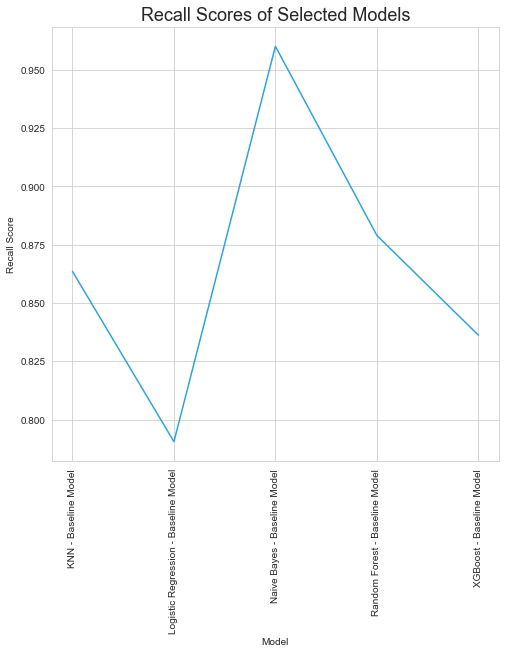

In [200]:
plt.figure(figsize=(8,8))
sns.lineplot(y=summary["Recall Score"], x=summary["Model"])
plt.xticks(rotation=90)
plt.title('Recall Scores of Selected Models',fontsize=18)

Observation : 
- Only XGBoost and Logistic Regression that give a good recall score with good fitting (not under/overfitting)

## Hyperparameter Tuning

### Random Forest

In [230]:
rf_params = {
    'max_depth': [50, 100],
    'max_features': [10, 15],
    'n_estimators': [100,500],
    'min_samples_split': [2, 5],
}

In [231]:
params = {
    'estimator': rf,
    'param_grid': rf_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'accuracy',
}
rf_cv = GridSearchCV(**params)

In [232]:
_ = rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 76.8min finished


In [233]:
rf_cv.best_params_

{&#39;max_depth&#39;: 50,
 &#39;max_features&#39;: 15,
 &#39;min_samples_split&#39;: 2,
 &#39;n_estimators&#39;: 500}

In [238]:
rf_tuned = RandomForestClassifier(max_depth=50,max_features=15,min_samples_split=2,n_estimators=500, random_state=42).fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
rf_acc_tuned = accuracy_score(y_test, y_pred_tuned)
print('Acc:',rf_acc_tuned)
print(classification_report(y_test, y_pred_tuned))

Acc: 0.9043500793573673
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15540
           1       0.92      0.88      0.90     15333

    accuracy                           0.90     30873
   macro avg       0.91      0.90      0.90     30873
weighted avg       0.91      0.90      0.90     30873



### XGBoost

In [234]:
xgb_params = {
    'n_estimators': [100, 500],
    'max_depth': [10,15],
    'min_samples_split': [2, 5],
}

In [235]:
params = {
    'estimator': xgb,
    'param_grid': xgb_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'accuracy',
}
xgb_cv = GridSearchCV(**params)

In [236]:
_ = xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 200.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 385.6min finished


In [237]:
xgb_cv.best_params_

{&#39;max_depth&#39;: 15, &#39;min_samples_split&#39;: 2, &#39;n_estimators&#39;: 500}

In [92]:
xgb_tuned = XGBClassifier(max_depth=15,min_samples_split=2,n_estimators=500).fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
xgb_acc_tuned = accuracy_score(y_test, y_pred_tuned)
print('Acc:',xgb_acc_tuned)
print(classification_report(y_test, y_pred_tuned))

Acc: 0.9077187186214491
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     15540
           1       0.91      0.90      0.91     15333

    accuracy                           0.91     30873
   macro avg       0.91      0.91      0.91     30873
weighted avg       0.91      0.91      0.91     30873



In [93]:
xgb_tuned_train = XGBClassifier(max_depth=15,min_samples_split=2,n_estimators=500).fit(X_train, y_train)
y_pred_train_tuned = xgb_tuned_train.predict(X_train)
xgb_acc_train_tuned = accuracy_score(y_train, y_pred_train_tuned)
print('Acc:',xgb_acc_train_tuned)
print(classification_report(y_train, y_pred_train_tuned))

Acc: 0.9899773727390091
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35915
           1       0.99      0.99      0.99     36122

    accuracy                           0.99     72037
   macro avg       0.99      0.99      0.99     72037
weighted avg       0.99      0.99      0.99     72037



[0.        0.        0.        ... 0.9954955 0.9956242 1.       ] [0.         0.00228266 0.00593491 ... 1.         1.         1.        ]


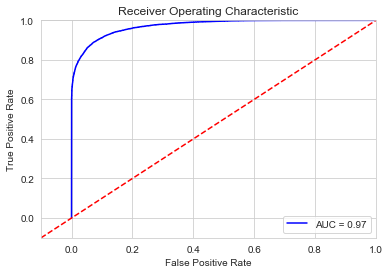

In [94]:
report.plot_roc_curve(xgb_tuned)

## Summary

- As we can see, after tuning the model, XGBoost gives slightly a better result than Random Forest. But after checking the overfitting for the model, it turns out that the model became overfitting, thus I will choose the XGBoost baseline as our model

In [108]:
import joblib

In [109]:
import pickle

In [110]:
from flask import Flask, request, render_template

In [111]:
df_hot.columns

Index([&#39;is_canceled&#39;, &#39;lead_time&#39;, &#39;is_repeated_guest&#39;,
       &#39;previous_cancellations&#39;, &#39;previous_bookings_not_canceled&#39;,
       &#39;booking_changes&#39;, &#39;adr&#39;, &#39;required_car_parking_spaces&#39;,
       &#39;total_of_special_requests&#39;, &#39;total_nights&#39;,
       ...
       &#39;company_530.0&#39;, &#39;company_531.0&#39;, &#39;company_534.0&#39;, &#39;company_539.0&#39;,
       &#39;company_541.0&#39;, &#39;company_543.0&#39;, &#39;customer_type_Contract&#39;,
       &#39;customer_type_Group&#39;, &#39;customer_type_Transient&#39;,
       &#39;customer_type_Transient-Party&#39;],
      dtype=&#39;object&#39;, length=1099)

In [117]:
joblib.dump(xgb, 'Hotelbookingcancelation_Final')

[&#39;Hotelbookingcancelation_Final&#39;]

In [292]:
for i in X_hot.columns:
    print(i)

lead_time
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
adr
required_car_parking_spaces
total_of_special_requests
total_nights
total_members
arrival_date_month_April
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
country_ABW
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_BHS
country_BIH
country_BLR
country_BOL
country_BRA
country_BRB
country_BWA
country_CAF
country_CHE
country_CHL
country_CHN
country_CIV
country_CMR
country_COL
country_COM
country_CPV
country_CRI
country_CUB
country_CYM
country_CYP
country_CZE

In [335]:
new_col = []
def col():
    for x in X_hot.columns[10:]:
        new_col.append(x.split('_'))
col()


In [336]:
new_col

, &#39;ISR&#39;],
 [&#39;country&#39;, &#39;ITA&#39;],
 [&#39;country&#39;, &#39;JAM&#39;],
 [&#39;country&#39;, &#39;JEY&#39;],
 [&#39;country&#39;, &#39;JOR&#39;],
 [&#39;country&#39;, &#39;JPN&#39;],
 [&#39;country&#39;, &#39;KAZ&#39;],
 [&#39;country&#39;, &#39;KEN&#39;],
 [&#39;country&#39;, &#39;KHM&#39;],
 [&#39;country&#39;, &#39;KIR&#39;],
 [&#39;country&#39;, &#39;KNA&#39;],
 [&#39;country&#39;, &#39;KOR&#39;],
 [&#39;country&#39;, &#39;KWT&#39;],
 [&#39;country&#39;, &#39;LAO&#39;],
 [&#39;country&#39;, &#39;LBN&#39;],
 [&#39;country&#39;, &#39;LBY&#39;],
 [&#39;country&#39;, &#39;LCA&#39;],
 [&#39;country&#39;, &#39;LIE&#39;],
 [&#39;country&#39;, &#39;LKA&#39;],
 [&#39;country&#39;, &#39;LTU&#39;],
 [&#39;country&#39;, &#39;LUX&#39;],
 [&#39;country&#39;, &#39;LVA&#39;],
 [&#39;country&#39;, &#39;MAC&#39;],
 [&#39;country&#39;, &#39;MAR&#39;],
 [&#39;country&#39;, &#39;MCO&#39;],
 [&#39;country&#39;, &#39;MDG&#39;],
 [&#39;country&#39;, &#39;MDV&#39;],
 [&#39;country&#39;,

In [366]:
col_final_1 = []
col_final_2 = []
def final():
    for x in new_col:
        if (x[0] != 'agent') & (x[0] != 'company') & (x[0] != 'reserved') & (x[0] != 'assigned') & (x[0] != 'market') & (x[0] != 'distribution'):
            col_final_1.append(x[-1])
        else:
            col_final_2.append(x[-2:])

final()

In [367]:
col_final_2

[[&#39;segment&#39;, &#39;Aviation&#39;],
 [&#39;segment&#39;, &#39;Complementary&#39;],
 [&#39;segment&#39;, &#39;Corporate&#39;],
 [&#39;segment&#39;, &#39;Direct&#39;],
 [&#39;segment&#39;, &#39;Groups&#39;],
 [&#39;segment&#39;, &#39;Offline TA/TO&#39;],
 [&#39;segment&#39;, &#39;Online TA&#39;],
 [&#39;segment&#39;, &#39;Undefined&#39;],
 [&#39;channel&#39;, &#39;Corporate&#39;],
 [&#39;channel&#39;, &#39;Direct&#39;],
 [&#39;channel&#39;, &#39;GDS&#39;],
 [&#39;channel&#39;, &#39;TA/TO&#39;],
 [&#39;channel&#39;, &#39;Undefined&#39;],
 [&#39;type&#39;, &#39;A&#39;],
 [&#39;type&#39;, &#39;B&#39;],
 [&#39;type&#39;, &#39;C&#39;],
 [&#39;type&#39;, &#39;D&#39;],
 [&#39;type&#39;, &#39;E&#39;],
 [&#39;type&#39;, &#39;F&#39;],
 [&#39;type&#39;, &#39;G&#39;],
 [&#39;type&#39;, &#39;H&#39;],
 [&#39;type&#39;, &#39;L&#39;],
 [&#39;type&#39;, &#39;A&#39;],
 [&#39;type&#39;, &#39;B&#39;],
 [&#39;type&#39;, &#39;C&#39;],
 [&#39;type&#39;, &#39;D&#39;],
 [&#39;type&#39;, &#39;E&#39;],
 [&#3

In [364]:
col_final_1

[&#39;April&#39;,
 &#39;August&#39;,
 &#39;December&#39;,
 &#39;February&#39;,
 &#39;January&#39;,
 &#39;July&#39;,
 &#39;June&#39;,
 &#39;March&#39;,
 &#39;May&#39;,
 &#39;November&#39;,
 &#39;October&#39;,
 &#39;September&#39;,
 &#39;ABW&#39;,
 &#39;AGO&#39;,
 &#39;AIA&#39;,
 &#39;ALB&#39;,
 &#39;AND&#39;,
 &#39;ARE&#39;,
 &#39;ARG&#39;,
 &#39;ARM&#39;,
 &#39;ASM&#39;,
 &#39;ATA&#39;,
 &#39;ATF&#39;,
 &#39;AUS&#39;,
 &#39;AUT&#39;,
 &#39;AZE&#39;,
 &#39;BDI&#39;,
 &#39;BEL&#39;,
 &#39;BEN&#39;,
 &#39;BFA&#39;,
 &#39;BGD&#39;,
 &#39;BGR&#39;,
 &#39;BHR&#39;,
 &#39;BHS&#39;,
 &#39;BIH&#39;,
 &#39;BLR&#39;,
 &#39;BOL&#39;,
 &#39;BRA&#39;,
 &#39;BRB&#39;,
 &#39;BWA&#39;,
 &#39;CAF&#39;,
 &#39;CHE&#39;,
 &#39;CHL&#39;,
 &#39;CHN&#39;,
 &#39;CIV&#39;,
 &#39;CMR&#39;,
 &#39;COL&#39;,
 &#39;COM&#39;,
 &#39;CPV&#39;,
 &#39;CRI&#39;,
 &#39;CUB&#39;,
 &#39;CYM&#39;,
 &#39;CYP&#39;,
 &#39;CZE&#39;,
 &#39;DEU&#39;,
 &#39;DJI&#39;,
 &#39;DMA&#39;,
 &#39;DNK&#39;,
 &#39;DOM&#39;,
 &#39;DZA&#39;,
 &

In [365]:
for i in X_hot.columns:
    print(i)

lead_time
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
adr
required_car_parking_spaces
total_of_special_requests
total_nights
total_members
arrival_date_month_April
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
country_ABW
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_BHS
country_BIH
country_BLR
country_BOL
country_BRA
country_BRB
country_BWA
country_CAF
country_CHE
country_CHL
country_CHN
country_CIV
country_CMR
country_COL
country_COM
country_CPV
country_CRI
country_CUB
country_CYM
country_CYP
country_CZE

In [293]:
dummy = ['arrival_date_month', 'country', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type', 'agent', 'company']

In [294]:
non_dummy = ['lead_time',
       'total_nights','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 
       'adr','required_car_parking_spaces', 'total_of_special_requests',
       'total_members'
       ]

In [310]:
def predict_cancel(lead_time,
       total_nights,is_repeated_guest, previous_cancellations,
       previous_bookings_not_canceled, booking_changes, 
       adr,required_car_parking_spaces, total_of_special_requests,
       total_members,arrival_date_month, country, meal,
       market_segment, distribution_channel, reserved_room_type, 
       assigned_room_type, deposit_type,customer_type, agent, company):    
    
    month_index = np.where(X.columns==arrival_date_month)[0][0]
    country_index = np.where(X.columns==country)[0][0]   
    agent_index = np.where(X.columns==agent)[0][0] 
    company_index = np.where(X.columns==company)[0][0] 
    meal_index = np.where(X.columns==meal)[0][0]    
    market_segment_index = np.where(X.columns==market_segment)[0][0]    
    distribution_channel_index = np.where(X.columns==distribution_channel)[0][0]
    reserved_room_type_index = np.where(X.columns==reserved_room_type)[0][0]
    assigned_room_type_index = np.where(X.columns==assigned_room_type)[0][0] 
    deposit_type_index = np.where(X.columns==deposit_type)[0][0]
    customer_type_index = np.where(X.columns==customer_type)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = lead_time
    x[1] = total_nights
    x[2] = total_members
    x[3] = is_repeated_guest
    x[4] = previous_cancellations
    x[5] = previous_bookings_not_canceled
    x[6] = booking_changes
    x[7] = adr
    x[8] = required_car_parking_spaces
    x[9] = total_of_special_requests
    
    if month_index >= 0:
        x[month_index] = 1

    if country_index >= 0:
        x[country_index] = 1 

    if agent_index >= 0:
        x[agent_index] = 1 

    if company_index >= 0:
        x[company_index] = 1       
    
    if meal_index >= 0:
        x[meal_index] = 1
        
    if market_segment_index >= 0:
        x[market_segment_index] = 1
    
    if distribution_channel_index >= 0:
        x[distribution_channel_index] = 1

    if reserved_room_type_index >= 0:
        x[reserved_room_type_index] = 1
        
    if assigned_room_type_index >= 0:
        x[assigned_room_type_index] = 1
        
    if deposit_type_index >= 0:
        x[deposit_type_index] = 1

    if customer_type_index >= 0:
        x[customer_type_index] = 1
        
    return xgb_tuned.predict([x])[0]

In [299]:
df_new_csv = df_hot.copy()

In [300]:
df_new_csv.drop('is_canceled', axis=1, inplace=True)

In [301]:
df_new_csv.to_csv('hotel_booking_cleaned_2.csv', index = False)

In [302]:
pd.read_csv('hotel_booking_cleaned_2.csv')

0              0   

        company_407.0  company_408.0  company_409.0  company_410.0  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
117425              0              0              0              0   
117426              0              0              0              0   
117427              0              0              0              0   
117428              0              0              0              0   
117429              0              0              0              0   

        company_411.0  company_412.0  company_413.0  company_415.0  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
117425              0              0              0              0   
117426              0              0              0              0   
117427              0              0              0              0   
117428              0              0              0              0   
117429              0              0              0              0   

        company_416.0  company_417.0  company_418.0  company_419.0  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
117425              0              0              0              0   
117426              0              0              0              0   
117427              0              0              0              0   
117428              0              0              0              0   
117429              0              0              0              0   

        company_420.0  company_421.0  company_422.0  company_423.0  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
117425              0              0              0              0   
117426              0              0              0              0   
117427              0              0              0              0   
117428              0              0              0              0   
117429              0              0              0              0   

        company_424.0  company_425.0  company_426.0  company_428.0  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
117425              0              0              0              0   
117426              0              0              0    

In [391]:
df.adr.max()

5400.0